# Problem, Data Description & Preparation

It is a 200 customers data from a mall:

1. CustomerID: Customer's primary index
2. Gender: Customer's gender
3. Age: Customer's age
4. Annual Income(k in dollars): Customer's annual income
5. Spending Score(1-100): Customer's score based on the spending history

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid", palette="rainbow")
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from tabulate import tabulate 

In [142]:
customer_data = pd.read_csv('Mall_Customers.csv')

In [143]:
customer_data.tail(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [144]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Remove Index column  

In [145]:
customer_data.drop(['CustomerID'], axis=1, inplace = True)

In [146]:
customer_data.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [147]:
customer_data.shape

(200, 4)

In [148]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


# Data Quality Checks

In [149]:
customer_data[customer_data.duplicated(keep=False)]

,Gender,Age,Annual Income (k$),Spending Score (1-100)


In [150]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


# Outlier Detection 

In [151]:
def plot(x):
    # Create a figure with custom subplots positions
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))

    # Plot the Histogram in the first subplot
    axes[0].set_title('Histogram Plot', fontsize=15)
    sns.histplot(x, ax=axes[0])

    # Plot the Box plot in the second subplot
    axes[1].set_title('Box Plot', fontsize=15)
    sns.boxplot(data=x, palette="Dark2", ax=axes[1])

    # Plot the KDE plot in the third subplot
    axes[2].set_title('KDE Plot', fontsize=15)
    sns.kdeplot(x, ax=axes[2])
    
    # Plot the KDE on Histogram plot in the fourth subplot
    axes[3].set_title('KDE on Histogram Plot', fontsize=15)
    sns.histplot(x, kde=True, ax=axes[3])

    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the figure with subplots
    plt.show()

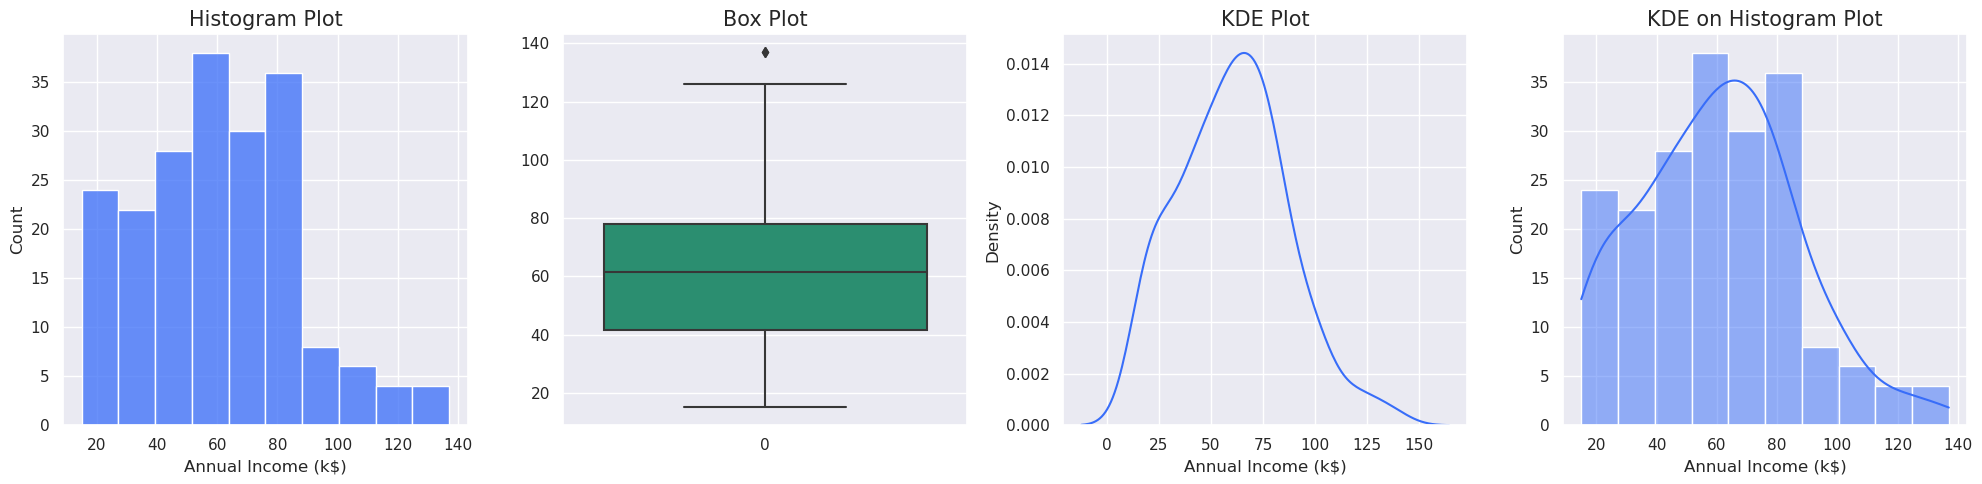

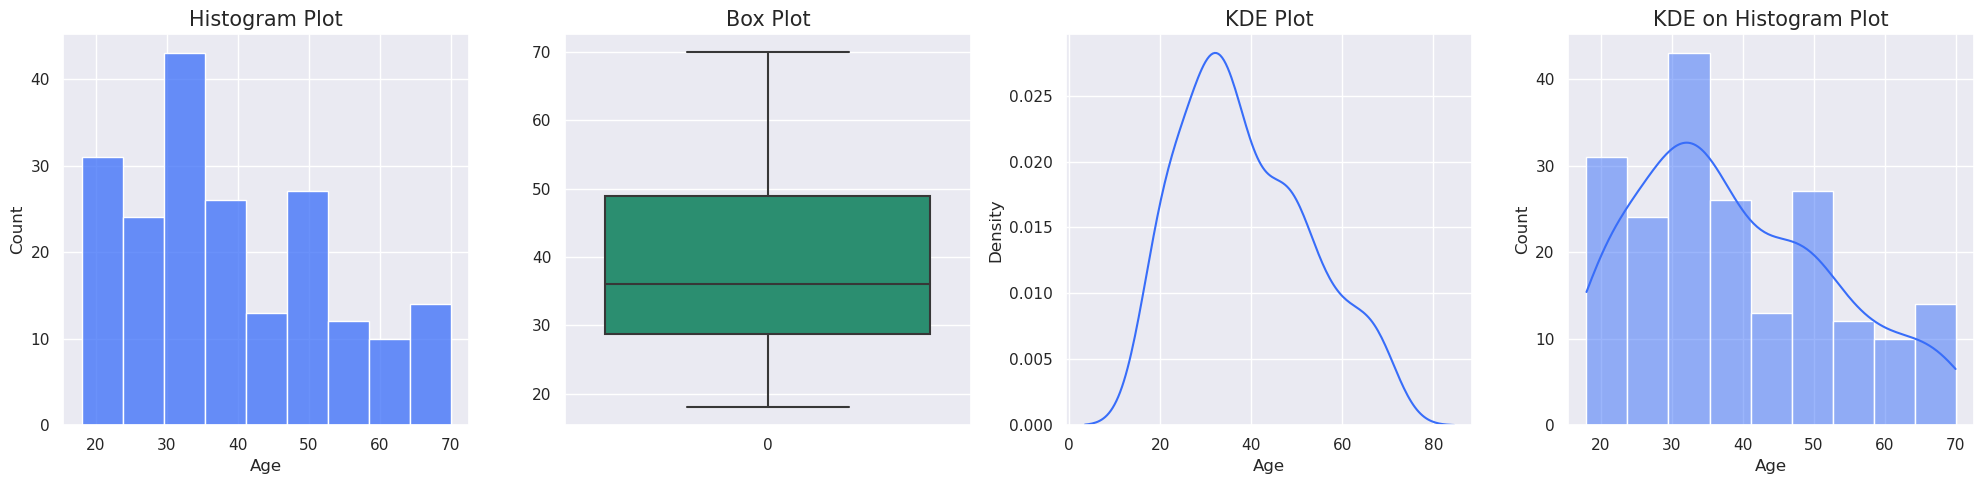

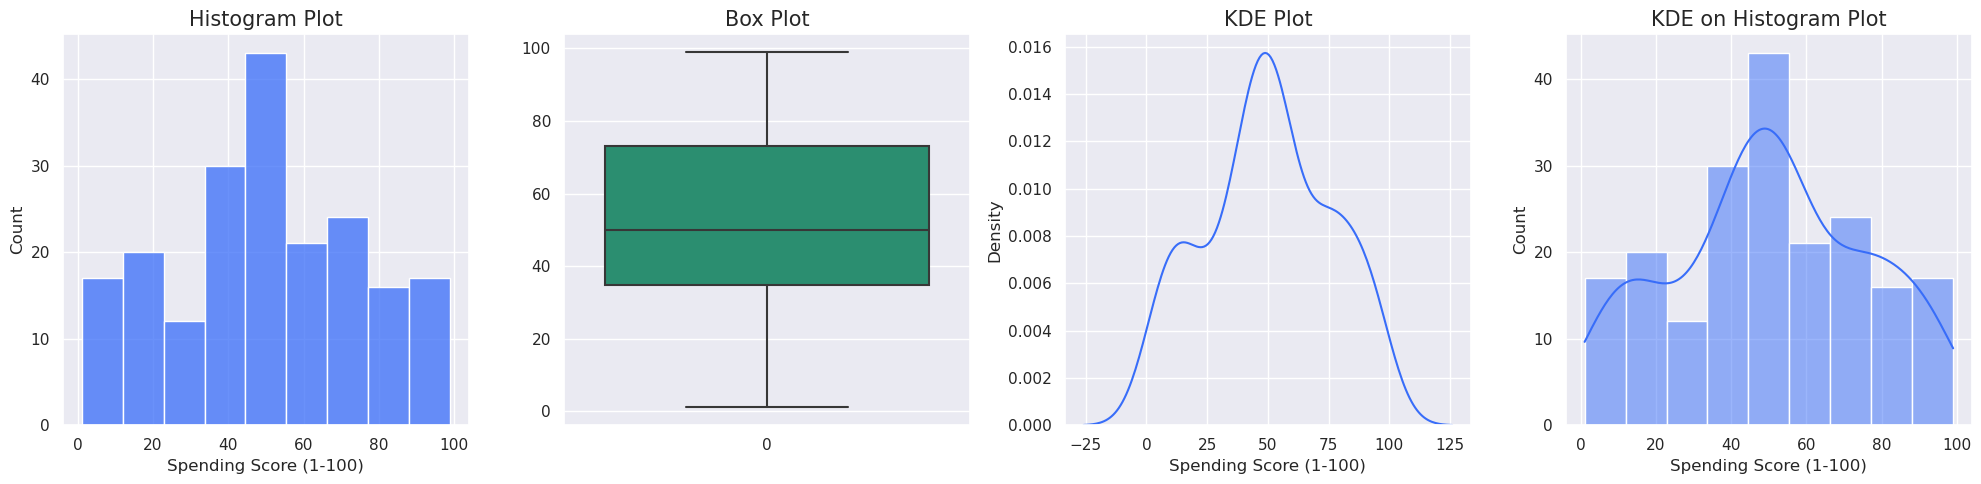

In [152]:
plot(customer_data['Annual Income (k$)'])
plot(customer_data['Age'])
plot(customer_data['Spending Score (1-100)'])

In [158]:
customer_data['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

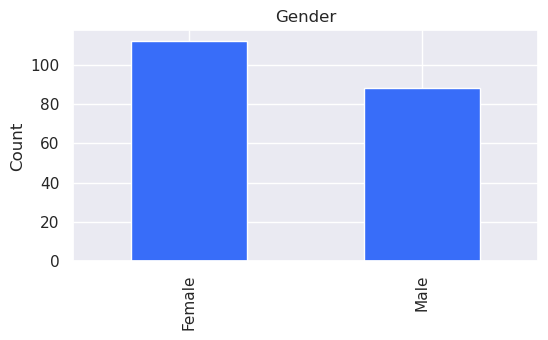

In [159]:
ax = customer_data['Gender'].value_counts().plot(kind='bar',
                                    figsize=(6, 3),
                                    title="Gender")
ax.set_ylabel("Count")
plt.show()

## Z score detection

In [160]:
def z_score_detection(x):
    
    lower_limit = np.mean(x) - 3 * np.std(x, ddof=1)
    upper_limit = np.mean(x) + 3 * np.std(x, ddof=1)
    outliers = x[(x < lower_limit) | (x > upper_limit)]
    
    return (lower_limit, upper_limit), outliers

## Interquartile range detection

In [161]:
def interquartile_range_detection(x):
    
    q25, q75 = np.percentile(x, [25, 75])
    IQR = q75 - q25
    lower_limit = q25 - (1.5 * IQR)
    upper_limit = q75 + (1.5 * IQR)
    outliers = x[(x < lower_limit) | (x > upper_limit)]
    
    return (lower_limit, upper_limit), outliers

## Percentile detection

In [87]:
def percentile_treatment(x, lower_threshold, upper_threshold):
    
    lower_limit, upper_limit = np.percentile(x, [lower_threshold, upper_threshold])
    outliers = x[(x < lower_limit) | (x > upper_limit)]
    
    return (lower_limit, upper_limit), outliers

In [163]:
print(interquartile_range_detection(customer_data['Age']))
print(interquartile_range_detection(customer_data['Annual Income (k$)']))
print(interquartile_range_detection(customer_data['Spending Score (1-100)']))

((-1.625, 79.375), Series([], Name: Age, dtype: int64))
((-13.25, 132.75), 198    137
199    137
Name: Annual Income (k$), dtype: int64)
((-22.625, 130.375), Series([], Name: Spending Score (1-100), dtype: int64))


## Trimming

### Features in the data are not normal distributed, so interquartile ranger treatment would be optimal choice.

In [164]:
trimmed_customer_data = customer_data[(customer_data['Annual Income (k$)'] > (-13.25)) & (customer_data['Annual Income (k$)'] < (132.75))]

In [165]:
trimmed_customer_data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,198.000000,198.000000,198.000000
mean,38.929293,59.787879,50.196970
std,14.016852,25.237259,25.746846
min,18.000000,15.000000,1.000000
25%,28.250000,40.500000,35.000000
50%,36.000000,61.000000,50.000000
75%,49.000000,77.750000,72.750000
max,70.000000,126.000000,99.000000


In [166]:
trimmed_customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 0 to 197
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  198 non-null    object
 1   Age                     198 non-null    int64 
 2   Annual Income (k$)      198 non-null    int64 
 3   Spending Score (1-100)  198 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.7+ KB


### Before Trimming

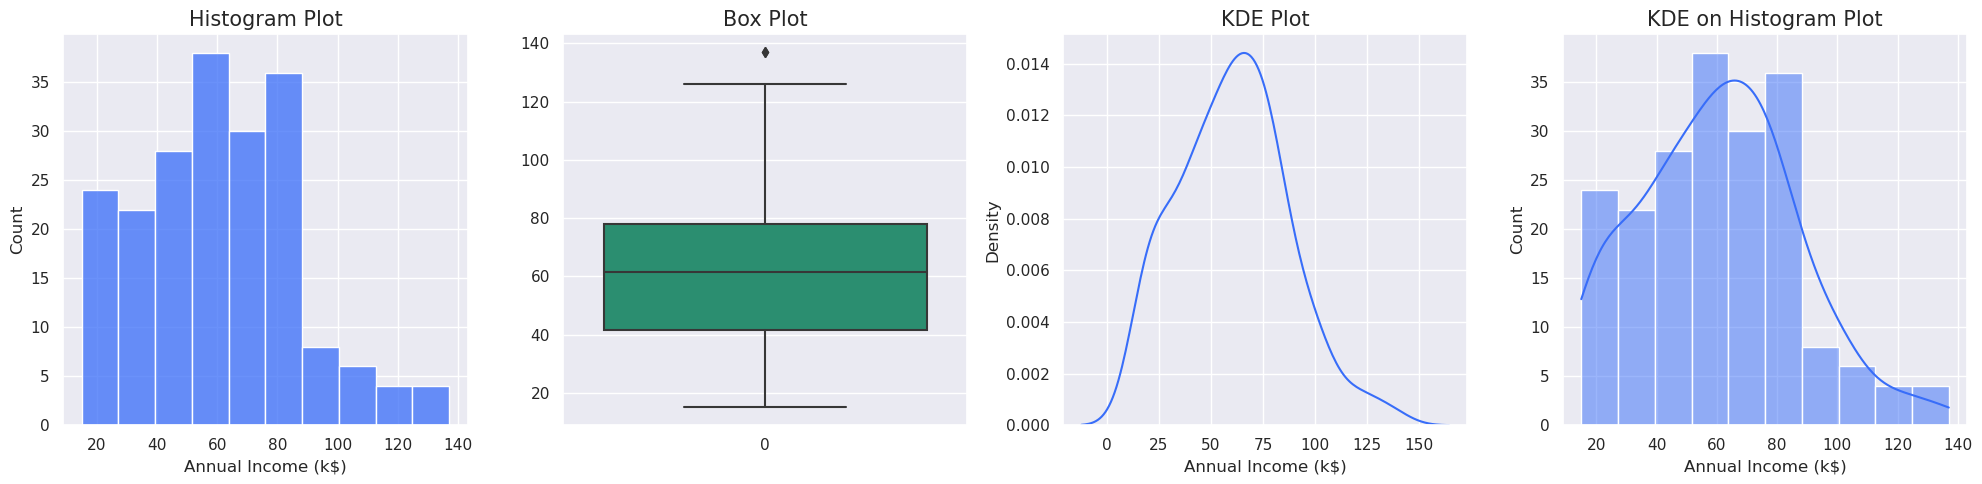

In [167]:
plot(customer_data['Annual Income (k$)'])

### After trimming

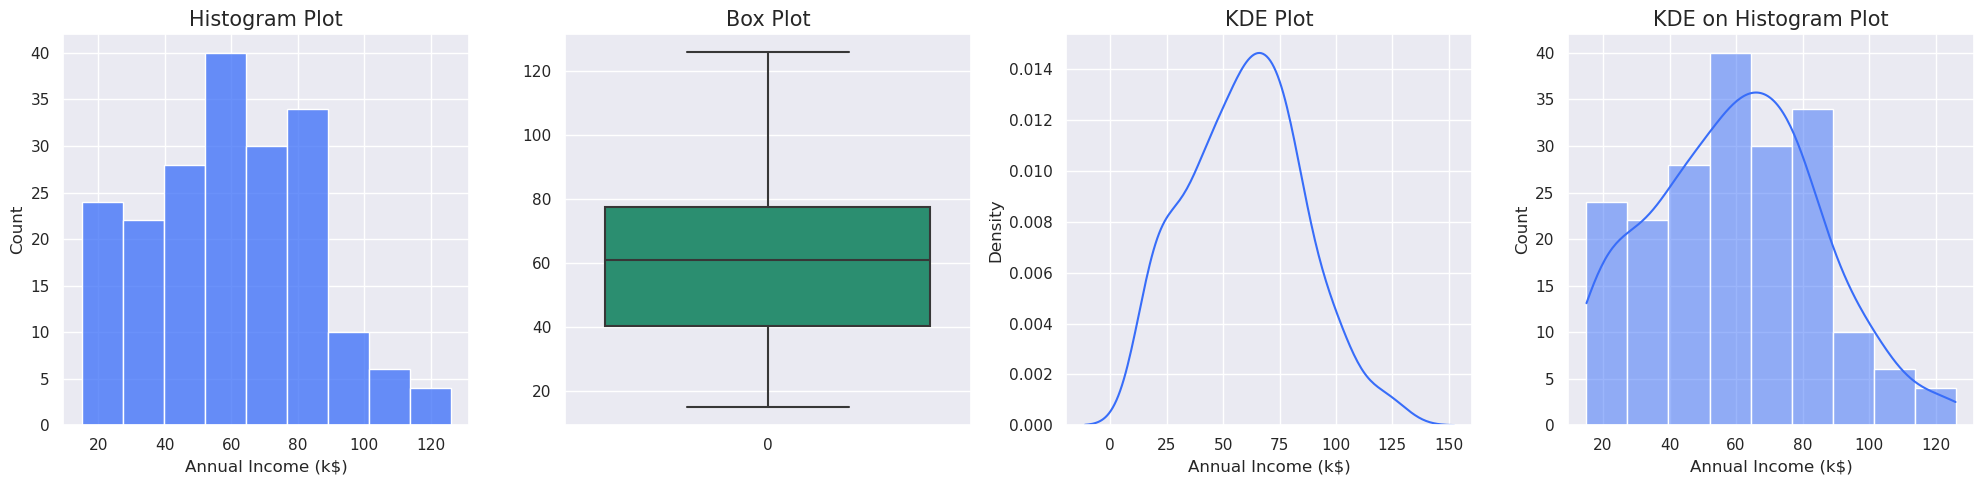

In [168]:
plot(trimmed_customer_data['Annual Income (k$)'])

## Capping 

In [169]:
lower_limit = -13.25
upper_limit = 132.75

capped_feature = pd.DataFrame(np.where(customer_data["Annual Income (k$)"] > upper_limit, upper_limit, 
         (np.where(customer_data["Annual Income (k$)"] < lower_limit, lower_limit, customer_data["Annual Income (k$)"]))), columns=["Annual Income (k$)"])

In [170]:
capped_customer_data = customer_data
capped_customer_data['Annual Income (k$)'] = capped_feature
capped_customer_data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.517500,50.200000
std,13.969007,26.143551,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,132.750000,99.000000


In [171]:
capped_customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  200 non-null    object 
 1   Age                     200 non-null    int64  
 2   Annual Income (k$)      200 non-null    float64
 3   Spending Score (1-100)  200 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 6.4+ KB


### Before Capping

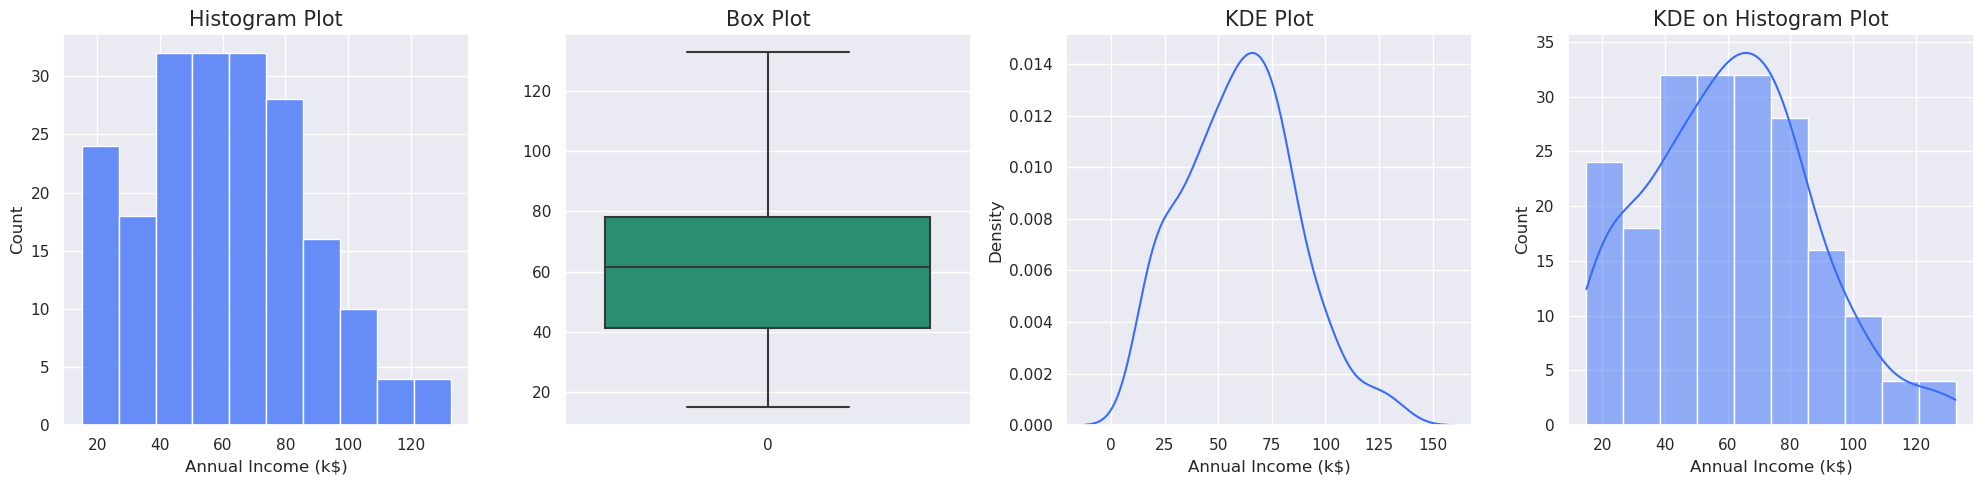

In [172]:
plot(customer_data['Annual Income (k$)'])

### After Capping

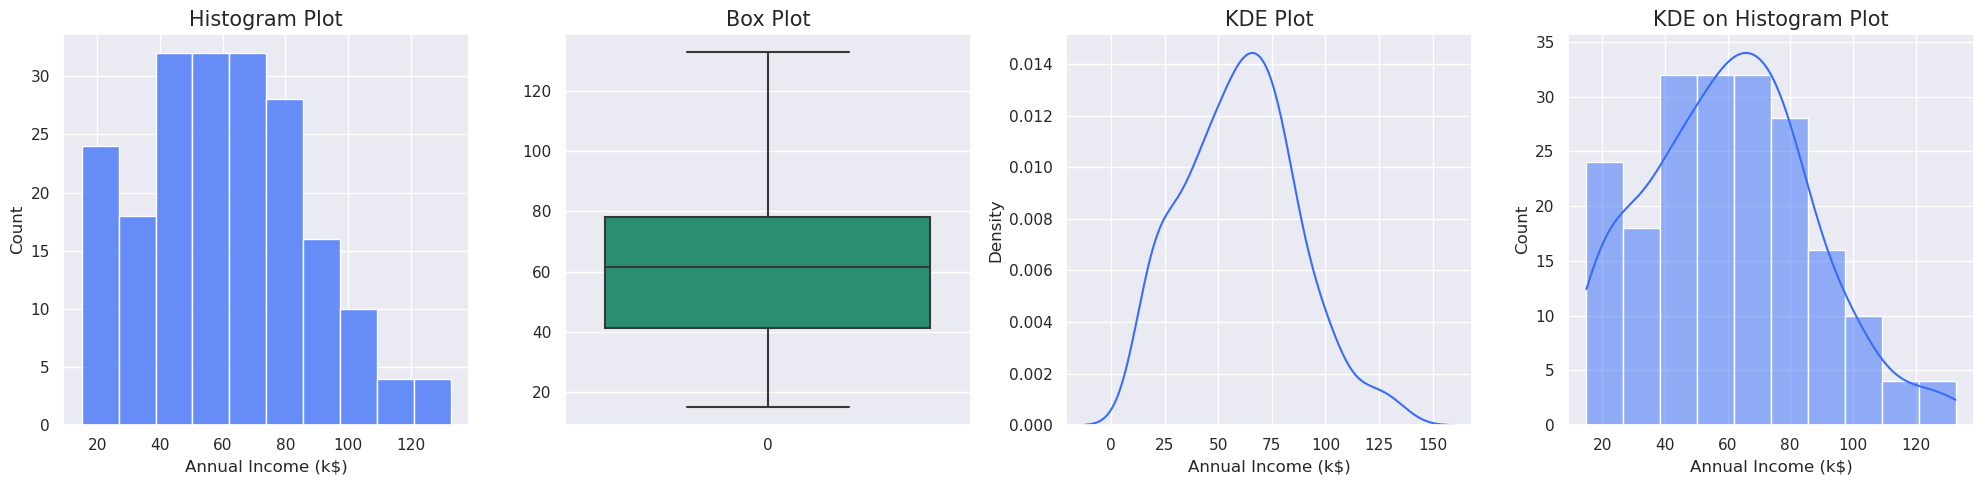

In [173]:
plot(capped_customer_data['Annual Income (k$)'])

# Missing Values Treatment

In [174]:
customer_data.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Filter the DataFrame to include only rows where any of the columns (axis 1 of the DataFrame) are null.

In [175]:
customer_data[customer_data.isnull().any(axis=1)]

,Gender,Age,Annual Income (k$),Spending Score (1-100)


# Data Analysis 

## Univariate Analysis 

In [176]:
trimmed_customer_data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,198.000000,198.000000,198.000000
mean,38.929293,59.787879,50.196970
std,14.016852,25.237259,25.746846
min,18.000000,15.000000,1.000000
25%,28.250000,40.500000,35.000000
50%,36.000000,61.000000,50.000000
75%,49.000000,77.750000,72.750000
max,70.000000,126.000000,99.000000


### Categorical Variables

In [121]:
gender_counts = trimmed_customer_data['Gender'].value_counts()
gender_precentage = (gender_counts / len(trimmed_customer_data)) * 100

# create a list of lists for tabulate
table_data = []
for gender, count, percentage in zip(gender_counts.index, gender_counts.values, gender_precentage.values):
    table_data.append([gender, count, f"{percentage: .2f}%"])
    
# define table headers
headers = ['Gender', 'Count', 'Percentage']

# use tabulate to print the data
table = tabulate(table_data, headers, tablefmt='grid')

# display the data
print(table)

+----------+---------+--------------+
| Gender   |   Count | Percentage   |
+==========+=========+==============+
| Female   |     112 | 56.57%       |
+----------+---------+--------------+
| Male     |      86 | 43.43%       |
+----------+---------+--------------+


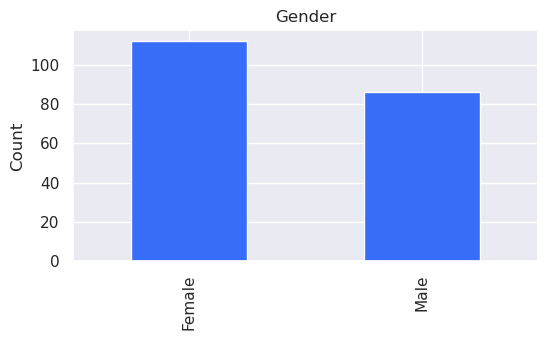

In [177]:
ax = trimmed_customer_data['Gender'].value_counts().plot(kind='bar',
                                    figsize=(6, 3),
                                    title="Gender")
ax.set_ylabel("Count")
plt.show()

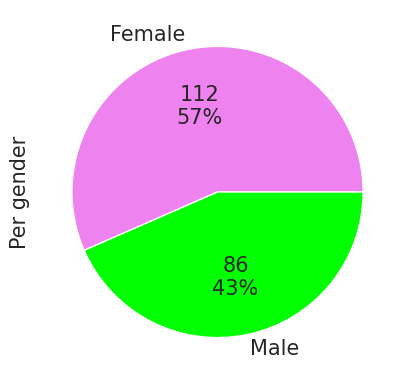

In [178]:
def label_function(val):
    return f'{val / 100 * len(trimmed_customer_data):.0f}\n{val:.0f}%'


fig, (ax) = plt.subplots(ncols=1, figsize=(8, 4))

trimmed_customer_data.groupby('Gender').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 15},
                                 colors=['violet', 'lime'], ax=ax)

ax.set_ylabel('Per gender', size=15)
plt.tight_layout()

### Numerical Variables

<AxesSubplot:xlabel='Age', ylabel='Count'>

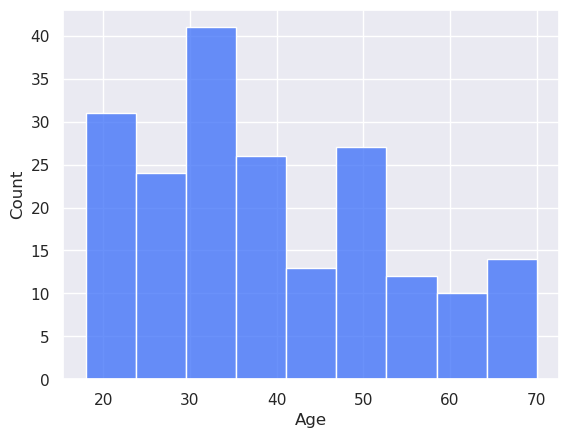

In [180]:
sns.histplot(trimmed_customer_data['Age'])

<AxesSubplot:>

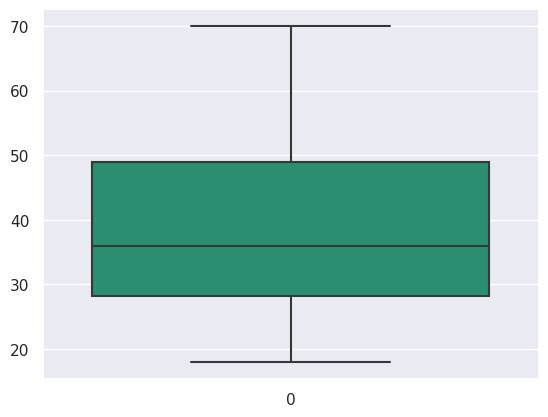

In [181]:
sns.boxplot(data=trimmed_customer_data['Age'], palette="Dark2")

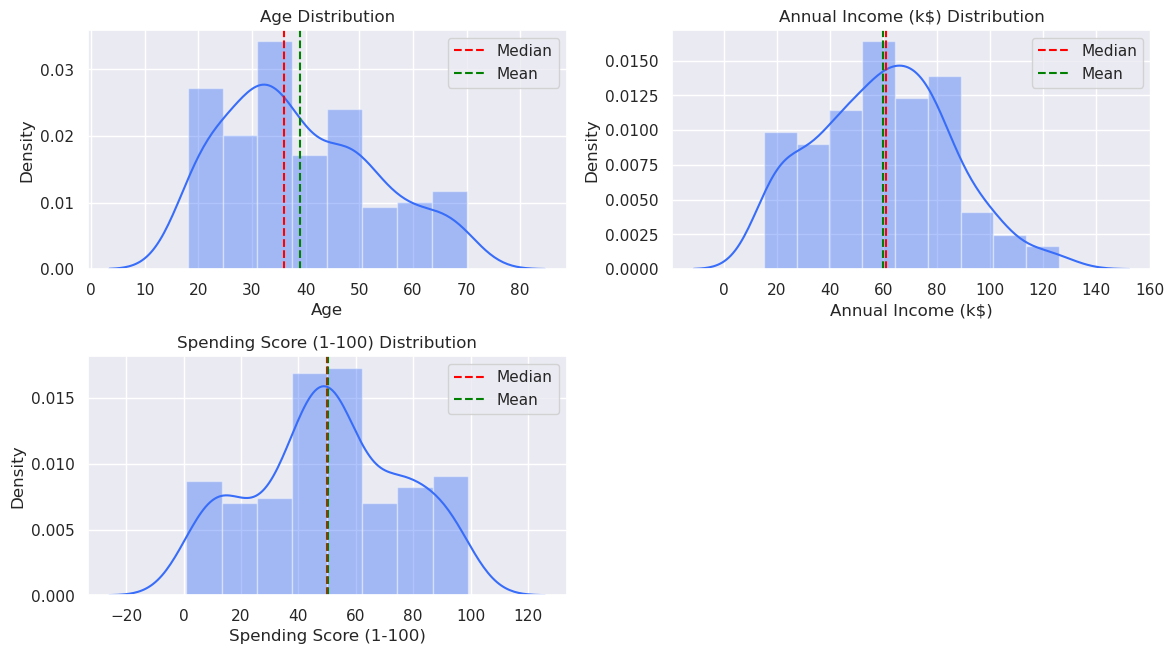

In [43]:
plt.figure(figsize=(12, 16))
for i, j in enumerate(trimmed_customer_data.describe().columns):
    plt.subplot(5, 2, i + 1)
    sns.distplot(trimmed_customer_data[j])
    plt.axvline(trimmed_customer_data[j].median(), color='r', linestyle='--', label='Median')
    plt.axvline(trimmed_customer_data[j].mean(), color='g', linestyle='--', label='Mean')
    plt.xlabel(j)
    plt.title('{} Distribution'.format(j))
    plt.legend()
    plt.tight_layout()

plt.show()

## Bivariate Analysis

### Scatter Plotting

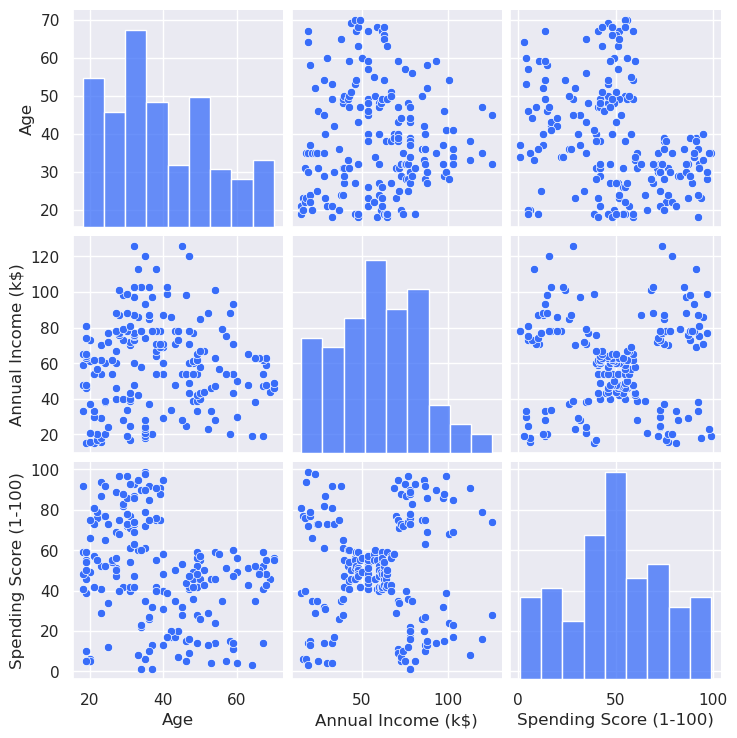

In [44]:
pairplot = sns.pairplot(trimmed_customer_data)
plt.show(pairplot)

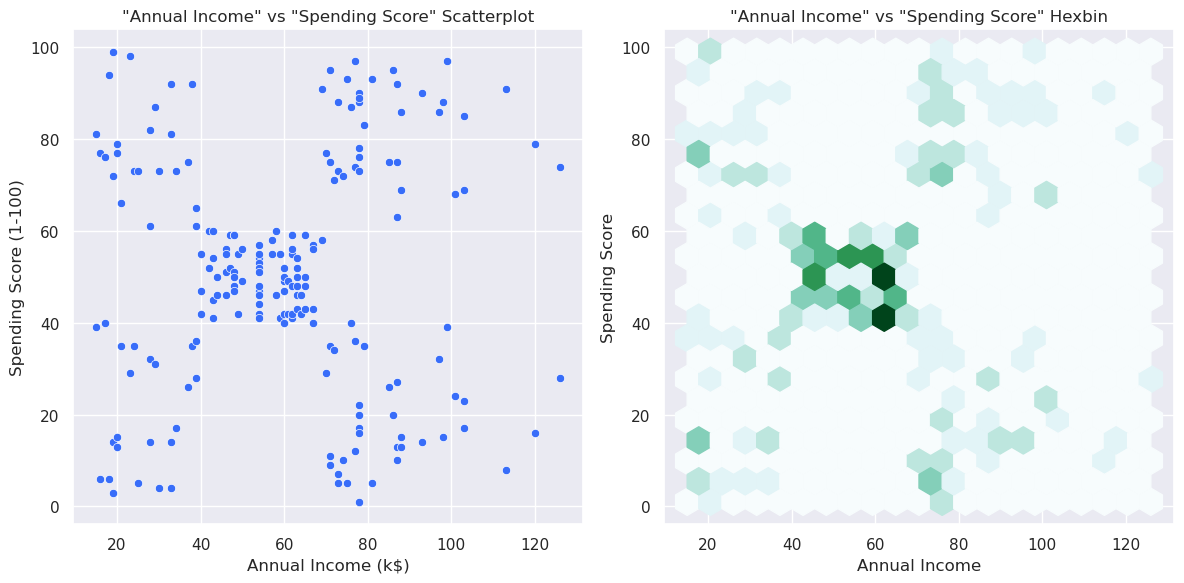

In [45]:
fig = plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
sns.scatterplot(x=trimmed_customer_data["Annual Income (k$)"], y=trimmed_customer_data["Spending Score (1-100)"])
plt.title('"Annual Income" vs "Spending Score" Scatterplot')
plt.tight_layout()
plt.subplot(1,2,2)
plt.hexbin(x=trimmed_customer_data["Annual Income (k$)"], y=trimmed_customer_data["Spending Score (1-100)"], gridsize = 20, cmap ='BuGn') 
plt.title('"Annual Income" vs "Spending Score" Hexbin')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.tight_layout()
plt.show()

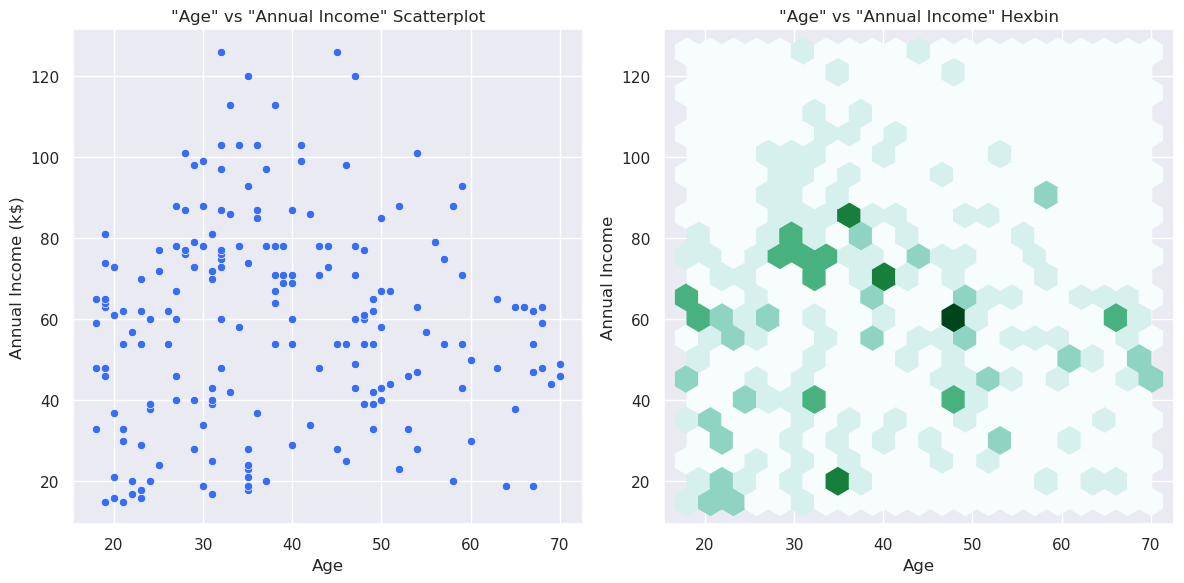

In [46]:
fig = plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(x=trimmed_customer_data["Age"], y=trimmed_customer_data["Annual Income (k$)"])
plt.title('"Age" vs "Annual Income" Scatterplot')
plt.tight_layout()
plt.subplot(1,2,2)
plt.hexbin(x=trimmed_customer_data["Age"], y=trimmed_customer_data["Annual Income (k$)"], gridsize = 20, cmap ='BuGn') 
plt.title('"Age" vs "Annual Income" Hexbin')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.tight_layout()
plt.show()

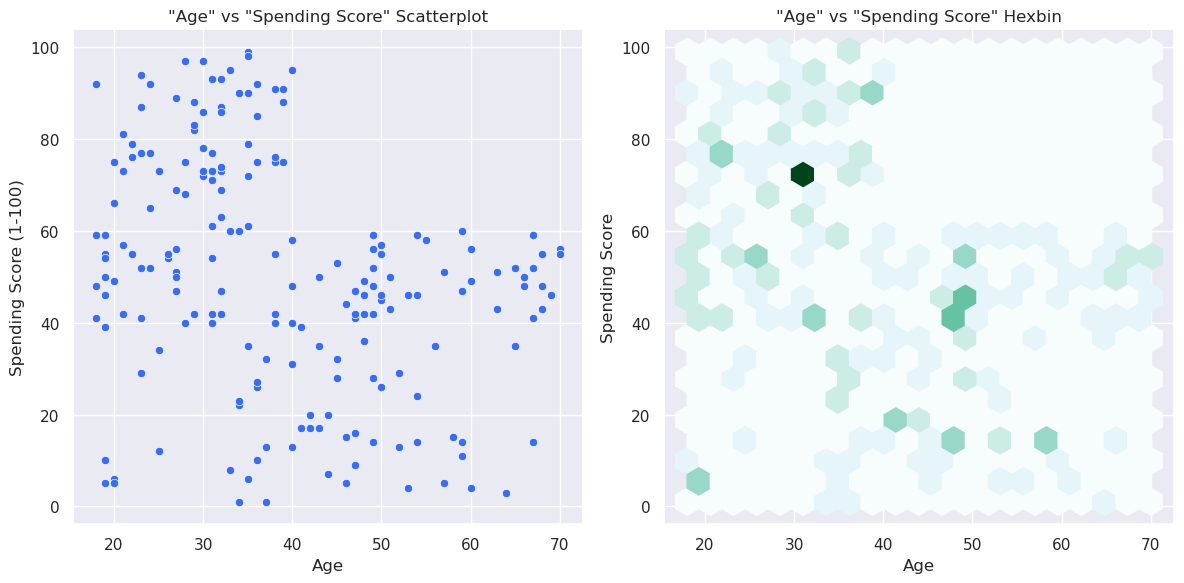

In [47]:
fig = plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(x=trimmed_customer_data["Age"], y=trimmed_customer_data["Spending Score (1-100)"])
plt.title('"Age" vs "Spending Score" Scatterplot')
plt.tight_layout()
plt.subplot(1,2,2)
plt.hexbin(x=trimmed_customer_data["Age"], y=trimmed_customer_data["Spending Score (1-100)"], gridsize = 20, cmap ='BuGn') 
plt.title('"Age" vs "Spending Score" Hexbin')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.tight_layout()
plt.show()

### Linear Correlation 

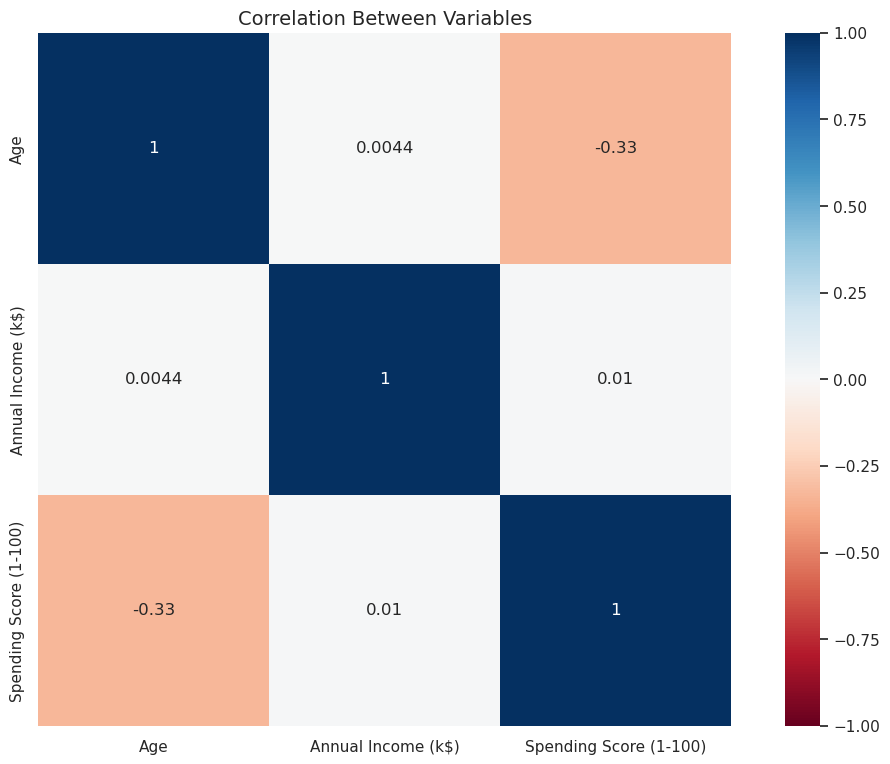

In [48]:
correlation_metrics=trimmed_customer_data.corr()
fig = plt.figure(figsize=(14,9))
sns.heatmap(correlation_metrics,square=True, annot=True, vmax=1, vmin=-1, cmap='RdBu')
plt.title('Correlation Between Variables', size=14)
plt.show()

# Statistical Testing